### Factor Analysis of Mixed Data (FAMD) using Prince
This example is taken from the [Prince website](https://github.com/MaxHalford/Prince).

We use FAMD when we have grouped data described by both quantitative and
qualitative variables. Roughly speaking, FAMD combines PCA for the quantitative
variables and MCA for the qualitative variables.

The example in this notebook uses the wine data from [a paper called
"Multiple Factor Analysis (MFA)"](https://www.utdallas.edu/~herve/Abdi-MFA2007-pretty.pdf), by Abdi and Valentin. Three experts gave their opinion on six different wines. Each opinion for each wine is recorded as a variable. We thus want to consider the separate opinions of each expert whilst also having a global overview of each wine. MFA is the perfect fit for this kind of situation.

In [1]:
import pandas as pd
from prince import FAMD
import matplotlib.pyplot as plt

In [2]:
X = pd.DataFrame(
    data=[
        [1, 'A', 'A', 'A', 2, 5, 7, 6, 3, 6, 7],
        [2, 'A', 'A', 'A', 4, 4, 4, 2, 4, 4, 3],
        [2, 'B', 'A', 'B', 5, 2, 1, 1, 7, 1, 1],
        [2, 'B', 'A', 'B', 7, 2, 1, 2, 2, 2, 2],
        [1, 'B', 'B', 'B', 3, 5, 6, 5, 2, 6, 6],
        [1, 'B', 'B', 'A', 3, 5, 4, 5, 1, 7, 5]
    ],
    columns=[
        'Oak type',
        'E1 fruity', 'E1 woody', 'E1 coffee',
        'E2 red fruit', 'E2 roasted', 'E2 vanillin', 'E2 woody',
        'E3 fruity', 'E3 butter', 'E3 woody'],
    index=['Wine {}'.format(i+1) for i in range(6)]
)
X

,Oak type,E1 fruity,E1 woody,E1 coffee,E2 red fruit,E2 roasted,E2 vanillin,E2 woody,E3 fruity,E3 butter,E3 woody
Wine 1,1,A,A,A,2,5,7,6,3,6,7
Wine 2,2,A,A,A,4,4,4,2,4,4,3
Wine 3,2,B,A,B,5,2,1,1,7,1,1
Wine 4,2,B,A,B,7,2,1,2,2,2,2
Wine 5,1,B,B,B,3,5,6,5,2,6,6
Wine 6,1,B,B,A,3,5,4,5,1,7,5


In [3]:
famd = FAMD(
    n_components=2,
    n_iter=3,
    copy=True,
    engine='auto',
    random_state=42
)
famd = famd.fit(X.drop('Oak type', axis='columns'))  # No need for 'Oak type'

In [4]:
famd.row_coordinates(X)

,0,1
Wine 1,3.351475,4.278852
Wine 2,3.396873,4.135743
Wine 3,4.777638,-1.643254
Wine 4,4.769714,-1.665251
Wine 5,3.779385,-3.053543
Wine 6,3.465413,-0.304409


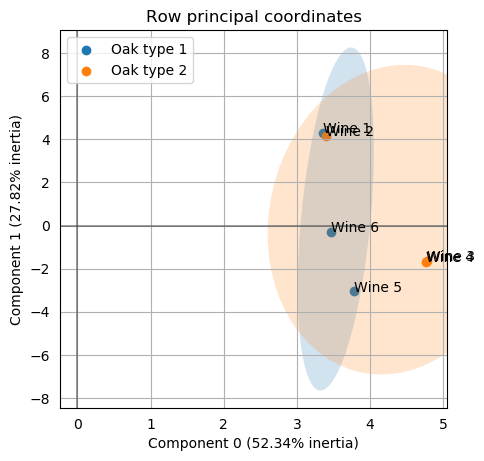

In [8]:
ax = famd.plot_row_coordinates(
    X,
    ax=None,
    x_component=0,
    y_component=1,
    labels=X.index,
    color_labels=['Oak type {}'.format(t) for t in X['Oak type']],
    ellipse_outline=False,
    ellipse_fill=True,
    show_points=True
)
fig = ax.get_figure()
fig.set_figheight(5)
fig.set_figwidth(5)
fig.set_dpi(100)
plt.show()